### Template Matching - Casamento de Modelo

### Atividade 4
Aluna: Meg Batista Alves

Template matching é uma técnica usada para identificar um pequeno recorte de uma imagem, ou um padrão em uma imagem maior. Isso pode ser feito usando várias métricas de similaridade como: soma das diferenças absolutas (SAD), soma dos quadrados das diferenças (SSD), coeficiente de correlação e correlação cruzada.

Para encontrar o patch, o usuário precisa fornecer duas imagens de entrada : Imagem de origem (I) - A imagem para encontrar o modelo e Imagem do modelo (T) - A imagem que pode ser encontrada na imagem de origem.

O objetivo deste exemplo é encontrar a área com a maior correspondência
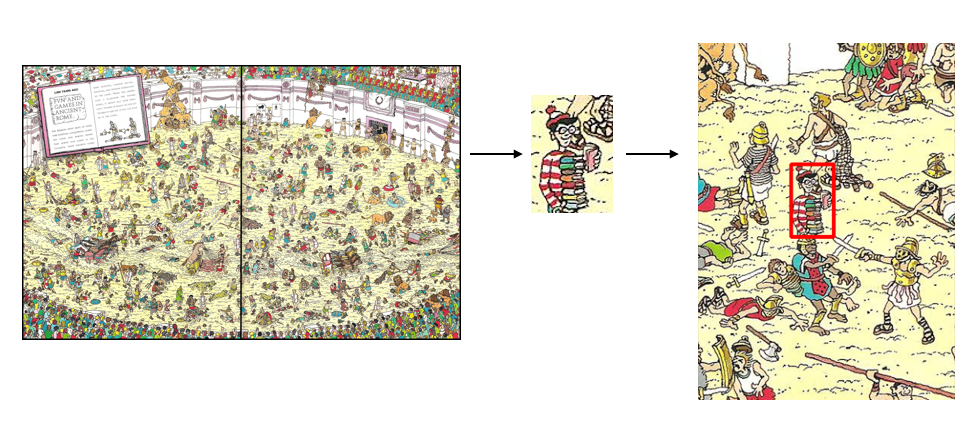


In [10]:
import cv2 as cv
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt

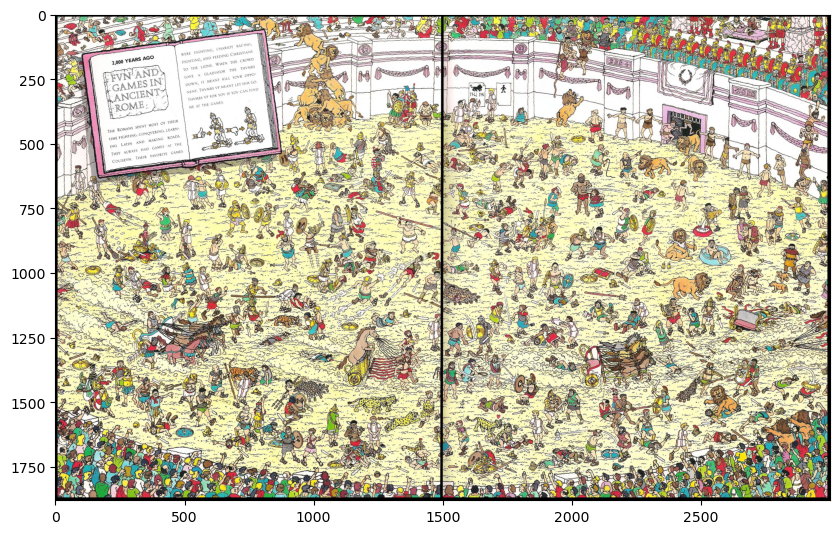

In [11]:
I = cv.imread('where-is-waldo.jpg')
I = cv.cvtColor(I, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(I)

A função a seguir é usada para escolher um patch da imagem

In [12]:
y, x = 250, 750
half_h, half_w = 100, 200

def pick_patch(I, y, x, half_h, half_w):
    return I[y-half_h:y+half_h+1, x-half_w:x+half_w+1, :]


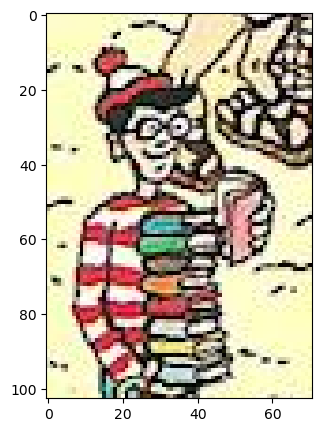

In [13]:
template = cv.imread('waldo.png')
template = cv.cvtColor(template, cv.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(template)

In [14]:
template = template.flatten()
patch = pick_patch(I, 300, 400, 15, 15).flatten()
print('Template size = {}'.format(template.shape[0]))
print('Patch size = {}'.format(patch.shape[0]))

Template size = 21939
Patch size = 2883


Considere:

Template:  T 

Imagem:  I

Patch da imagem centrada em (i,j) : I(i+k,j+l)

Resposta:  R


A função highlight é usada para desenhar a caixa delimitadora

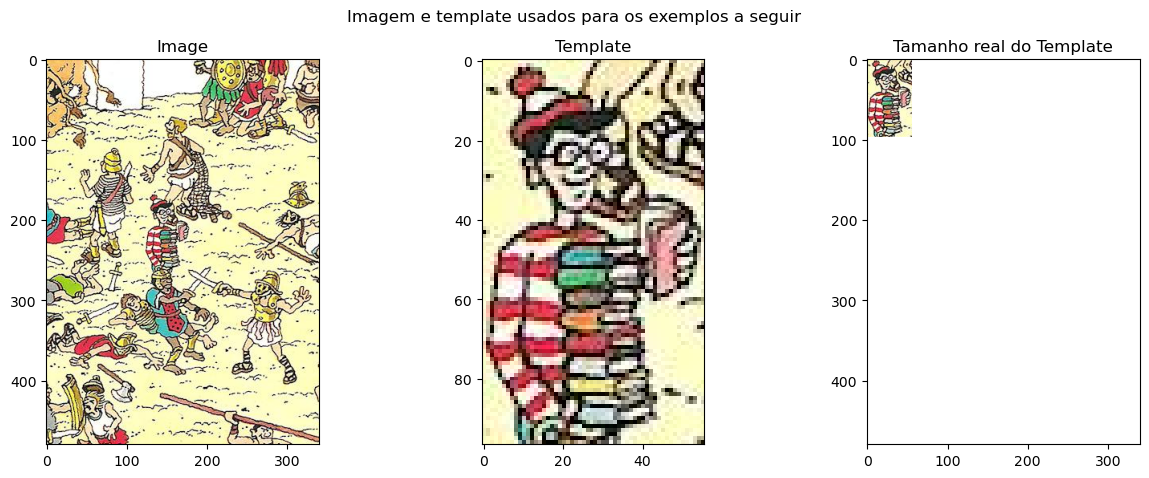

In [15]:
def highlight(R, T, I, use_max=True):
    W, H = I.shape[0], I.shape[1]
    w, h = T.shape[0], T.shape[1]
    wr, hg = R.shape[0], R.shape[1]
#     print(W,H)
#     print(w,h)
#     print(wr,hg)
        
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(R)
    loc = max_loc if use_max else min_loc
    loc = loc + np.array([h//2, w//2])               # Size of R is different from I 
    tl = loc - np.array([h//2, w//2])
    br = loc + np.array([h//2, w//2])
    I_ = np.copy(I)
    c = (1.0, 0, 0) if I_.dtype == 'float32' else (255, 0, 0)
#     print(c)
#     print(tl)
#     print(br)
    cv.rectangle(I_, tuple(tl), tuple(br), c, 4)
    return I_

# Image
img_waldo = cv.imread('where-is-waldo.jpg')
img_waldo = cv.cvtColor(img_waldo, cv.COLOR_BGR2RGB)
img_waldo_zoomed = img_waldo[344:824, 1100:1440, :]
img = cv.cvtColor(img_waldo_zoomed, cv.COLOR_RGB2GRAY)
# plt.figure(figsize=(20,20))
# plt.imshow(img_waldo_zoomed)
# plt.xticks([])
# plt.yticks([])

# Template
waldo = img_waldo_zoomed[167:264,123:179,:]
template = cv.cvtColor(waldo, cv.COLOR_RGB2GRAY)
foo = np.ones(img_waldo_zoomed.shape, dtype=img_waldo_zoomed.dtype)*255
foo[0:waldo.shape[0],0:waldo.shape[1],:] = waldo

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Image')
plt.imshow(img_waldo_zoomed)
plt.subplot(132)
plt.title('Template')
plt.imshow(waldo)
plt.subplot(133)
plt.title('Tamanho real do Template')
plt.imshow(foo)
plt.suptitle('Imagem e template usados para os exemplos a seguir');

## Técnicas de template matching

Para realizar o casamento de modelo usaremos a função matchTemplate disponível na biblioteca do OpenCV.

Na função cv.matchTemplate(I, T, eval(method)), o primeiro parâmetro é a imagem principal, o segundo parâmetro é o modelo a ser correspondido e o terceiro parâmetro é o método usado para corresponder.

A função matchTemplate é altamente otimizada. Utiliza FFT (Fast Fourier Transform) e outros métodos para acelerar o processamento.

Essa função possui vários métodos que são exemplificados a seguir

### Soma dos Quadrados das Diferenças - SSD

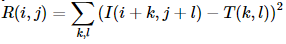


Aqui R(i,j) codifica a distância entre o modelo e patch da imagem centrado no local da imagem(i,j)
Quanto menor esse valor, mais semelhante é o modelo ao patch.

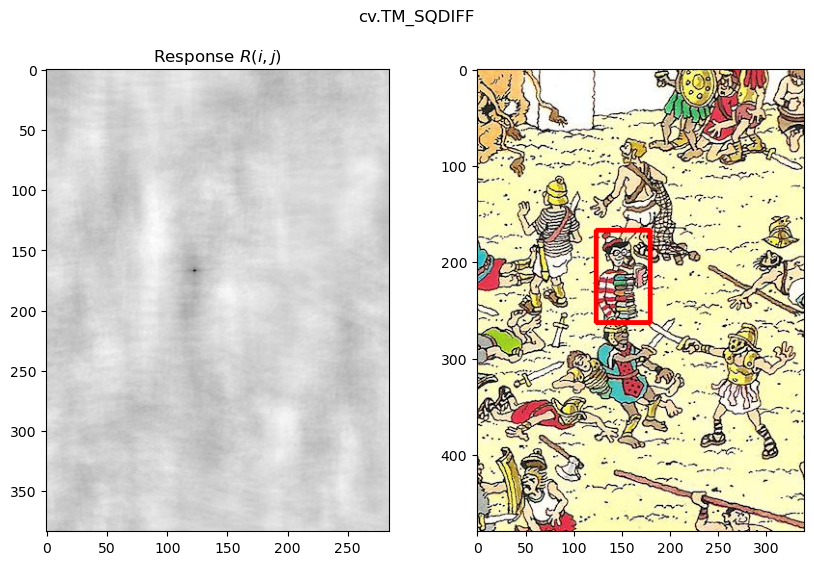

In [16]:
T = template.copy()
I = img.copy()

method = 'cv.TM_SQDIFF'
R = cv.matchTemplate(I, T, eval(method))
I_ = highlight(R, T, img_waldo_zoomed, use_max=False)

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title('Response $R(i,j)$')
plt.imshow(R, cmap = 'gray')
plt.subplot(122)
plt.imshow(I_)
plt.suptitle(method)
plt.show();

### Soma dos Quadrados das Diferenças normalizado

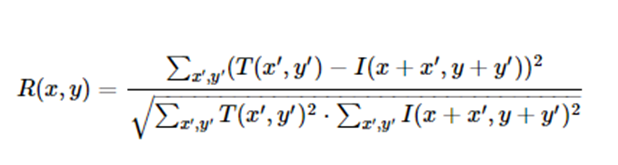

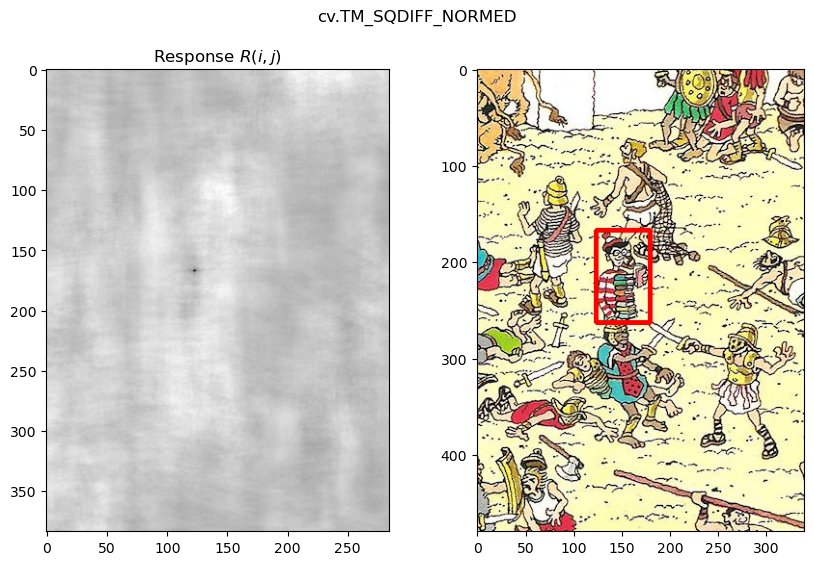

In [17]:
T = template.copy()
I = img.copy()

method = 'cv.TM_SQDIFF_NORMED'
R = cv.matchTemplate(I, T, eval(method))
I_ = highlight(R, T, img_waldo_zoomed, use_max=False)

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title('Response $R(i,j)$')
plt.imshow(R, cmap = 'gray')
plt.subplot(122)
plt.imshow(I_)
plt.suptitle(method)
plt.show();

### Coeficiente de Correlação

O coeficiente de correlação cruzada é uma medida do grau em que o movimento de duas variáveis ​​aleatórias está associado



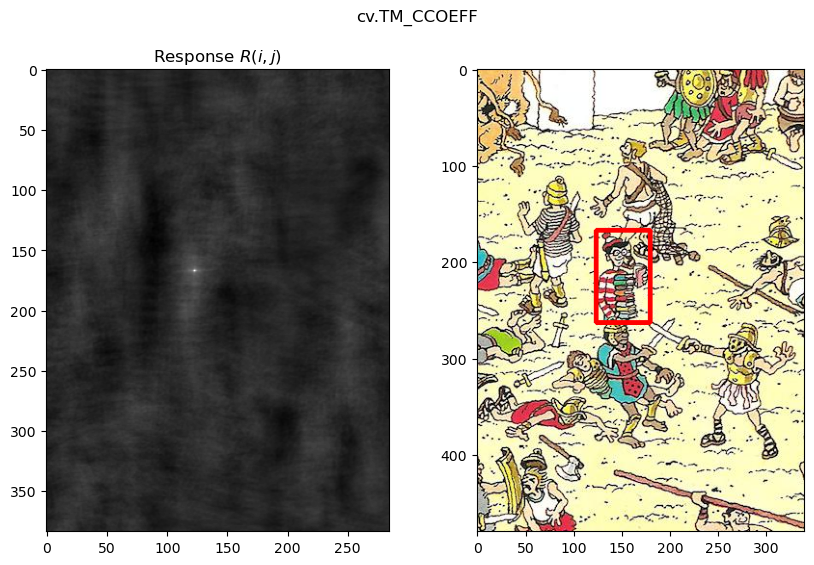

In [18]:
T = template.copy()
I = img.copy()

method = 'cv.TM_CCOEFF'
R = cv.matchTemplate(I, T, eval(method))
I_ = highlight(R, T, img_waldo_zoomed, use_max=True)

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title('Response $R(i,j)$')
plt.imshow(R, cmap = 'gray')
plt.subplot(122)
plt.imshow(I_)
plt.suptitle(method)
plt.show();

### Coeficiente de Correlação Normalizada



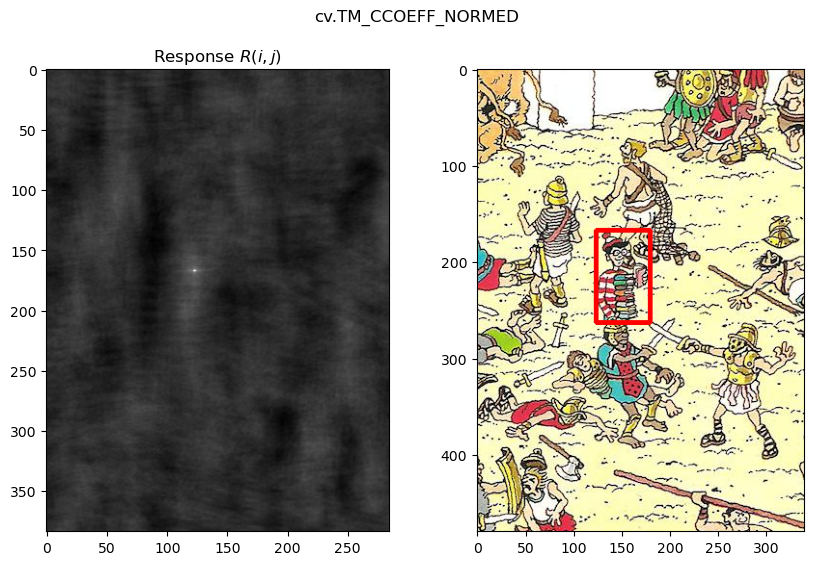

In [19]:
T = template.copy()
I = img.copy()

method = 'cv.TM_CCOEFF_NORMED'
R = cv.matchTemplate(I, T, eval(method))
I_ = highlight(R, T, img_waldo_zoomed, use_max=True)

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title('Response $R(i,j)$')
plt.imshow(R, cmap = 'gray')
plt.subplot(122)
plt.imshow(I_)
plt.suptitle(method)
plt.show();

## Correlação Cruzada - Cross-Correlation

Na correlação os maiores valores são obtidos nas regiões da imagem onde ocorre a correspondência do patch da imagem com o modelo.

A correlação de um kernel *w* com uma função *f(x,y)* é dada por:

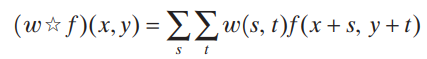

A correlação tem seus maiores valores nas regiões onde *w* e *f* são muito semelhantes, o problema desta equação é que o resultado é sensível a mudanças na amplitude, a resposta é mais forte para intensidades mais altas, o que leva a um falso positivo, logo o waldo não é encontrado.


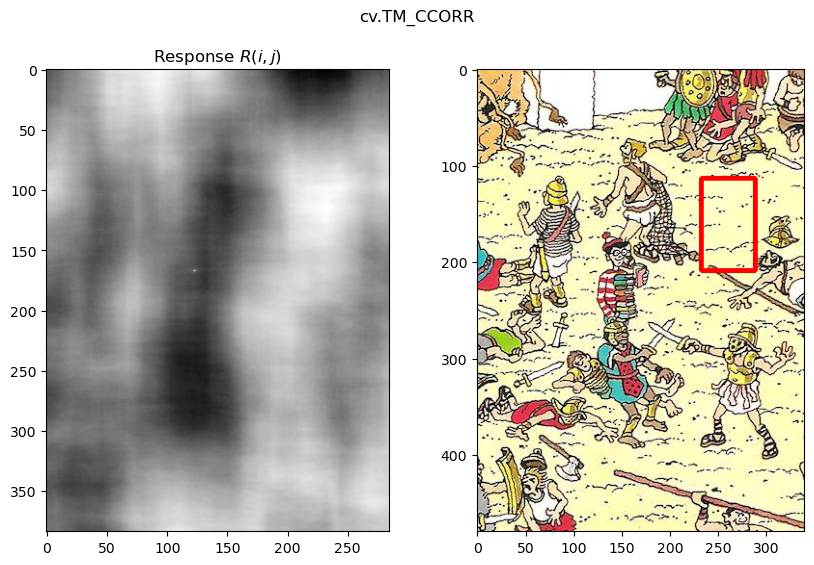

In [20]:
T = template.copy()
I = img.copy()

method = 'cv.TM_CCORR'
R = cv.matchTemplate(I, T, eval(method))
I_ = highlight(R, T, img_waldo_zoomed, use_max=True)

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title('Response $R(i,j)$')
plt.imshow(R, cmap = 'gray')
plt.subplot(122)
plt.imshow(I_)
plt.suptitle(method)
plt.show();

## Correlação Cruzada Normalizada - Normalized Cross-Correlation


Para normalizar a correlação com as mudanças de amplitude em uma ou ambas as funções, realizamos correspondência usando o coeficiente de correlação em vez disso:

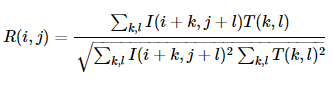

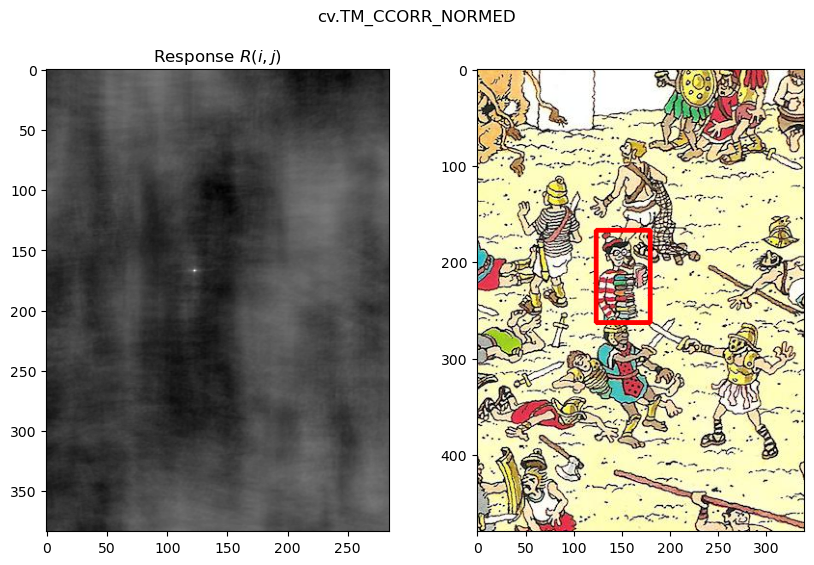

In [21]:
T = template.copy()
I = img.copy()

method = 'cv.TM_CCORR_NORMED'
R = cv.matchTemplate(I, T, eval(method))
I_ = highlight(R, T, img_waldo_zoomed, use_max=True)

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title('Response $R(i,j)$')
plt.imshow(R, cmap = 'gray')
plt.subplot(122)
plt.imshow(I_)
plt.suptitle(method)
plt.show();

Considerações de Escala

Text(0.5, 0.98, 'Image and template used for the following examples')

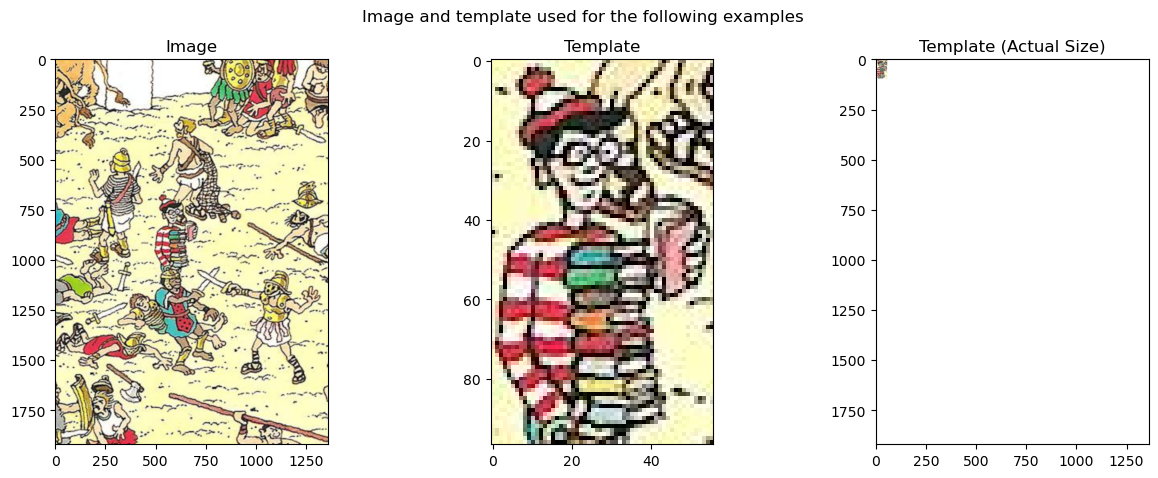

In [23]:
# Image
scale = 4
img_waldo = cv.imread('where-is-waldo.jpg')
img_waldo = cv.cvtColor(img_waldo, cv.COLOR_BGR2RGB)
img_waldo_zoomed = img_waldo[344:824, 1100:1440, :]
H, W = img_waldo_zoomed.shape[0], img_waldo_zoomed.shape[1]
img_waldo_resized = cv.resize(img_waldo_zoomed, (int(W*scale),int(H*scale)))
img = cv.cvtColor(img_waldo_resized, cv.COLOR_RGB2GRAY)

# Template
waldo = img_waldo_zoomed[167:264,123:179,:]
template = cv.cvtColor(waldo, cv.COLOR_RGB2GRAY)
foo = np.ones(img_waldo_resized.shape, dtype=img_waldo_resized.dtype)*255
foo[0:waldo.shape[0],0:waldo.shape[1],:] = waldo

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('Image')
plt.imshow(img_waldo_resized)
plt.subplot(132)
plt.title('Template')
plt.imshow(waldo)
plt.subplot(133)
plt.title('Template (Actual Size)')
plt.imshow(foo)
plt.suptitle('Image and template used for the following examples')

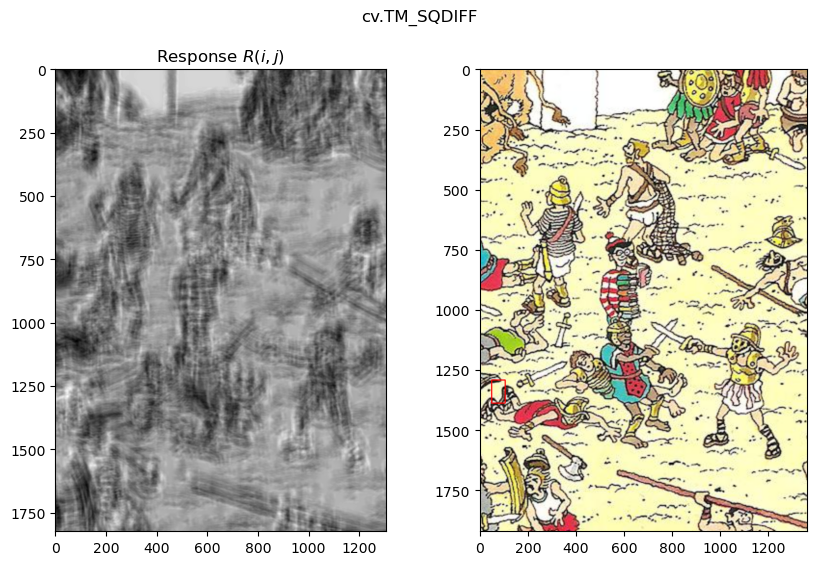

In [25]:
T = template.copy()
I = img.copy()

methods = ['cv.TM_CCOEFF', 
           'cv.TM_CCOEFF_NORMED', 
           'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 
           'cv.TM_SQDIFF', 
           'cv.TM_SQDIFF_NORMED']

method = methods[4]
R = cv.matchTemplate(I, T, eval(method))
I_ = highlight(R, T, img_waldo_resized, use_max=True)

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title('Response $R(i,j)$')
plt.imshow(R, cmap = 'gray')
plt.subplot(122)
plt.imshow(I_)
plt.suptitle(method)
plt.show();